# PCA For Wine Data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('wine (1).csv')
df
X = df.iloc[:, :13].values
y = df.iloc[:, 13].values

In [8]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print (explained_variance_ratio)

[0.40273021 0.16039916 0.11715174 0.0738292  0.06677068 0.04546036
 0.03852294 0.02718277 0.0208619  0.01961024 0.01307415 0.00911849
 0.00528816]


In [12]:
var1 = np.cumsum(np.round(explained_variance_ratio,decimals = 4)*100)
var1

array([ 40.27,  56.31,  68.03,  75.41,  82.09,  86.64,  90.49,  93.21,
        95.3 ,  97.26,  98.57,  99.48, 100.01])

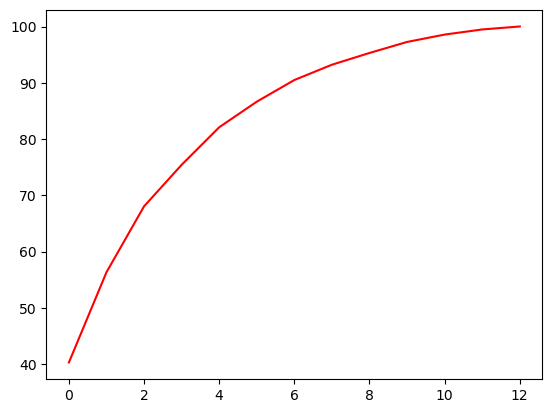

In [13]:
plt.plot(var1,color="red")


In [14]:
# Extract top 2 principal components

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print (explained_variance)

[0.40273021 0.16039916]


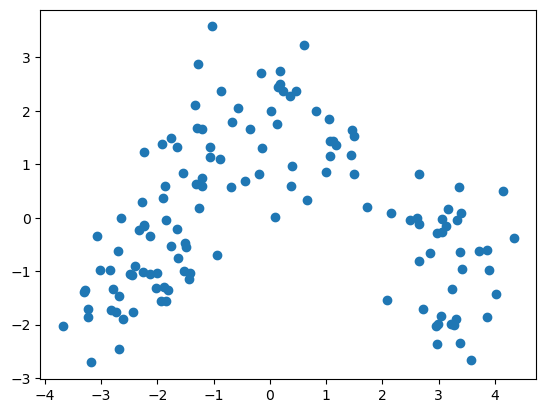

In [15]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
clf.score(X_test, y_test)

0.0

In [20]:
clf.score(X_train, y_train)

0.12781954887218044

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_subset = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:3]))
df_subset    

,0,1
0,1.518613,-0.562250
1,0.246290,-0.499413
2,0.196879,0.021231
3,1.691550,-0.346811
4,0.295700,0.227694
...,...,...
173,0.876275,2.974543
174,0.493343,1.412609
175,0.332758,1.744744
176,0.209232,0.227694


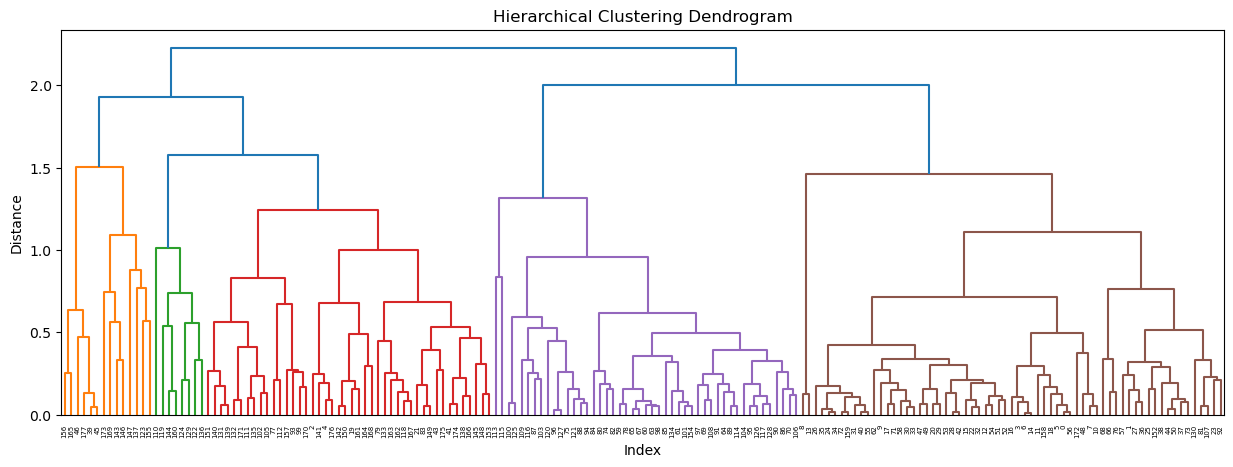

In [22]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()       

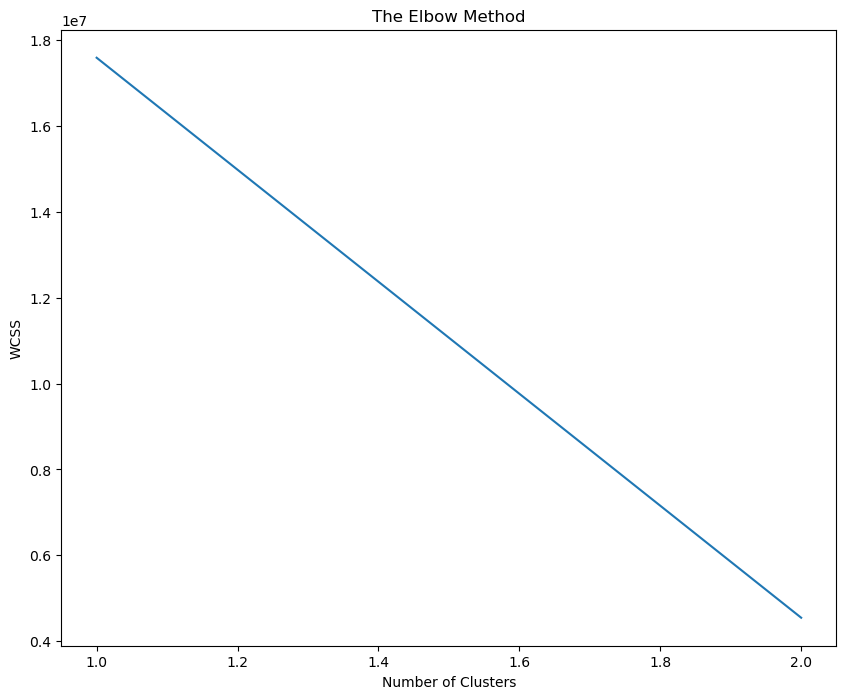

In [23]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 3):
    clf = KMeans(n_clusters=i)
    clf.fit(df)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 3), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [28]:
WCSS  

[17592402.70373319, 4543801.220149008]